<a href="https://colab.research.google.com/github/Sarik123-long/Data-Analytics-with_Oasis_Infobyte/blob/main/Project_Title_1_1_EDA_on_Retail_Sales_Data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving retail sales.csv to retail sales.csv
User uploaded file "retail sales.csv" with length 51673 bytes


Dataset Shape: (1000, 9)

Data Types:
 Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Basic Statistics:

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:

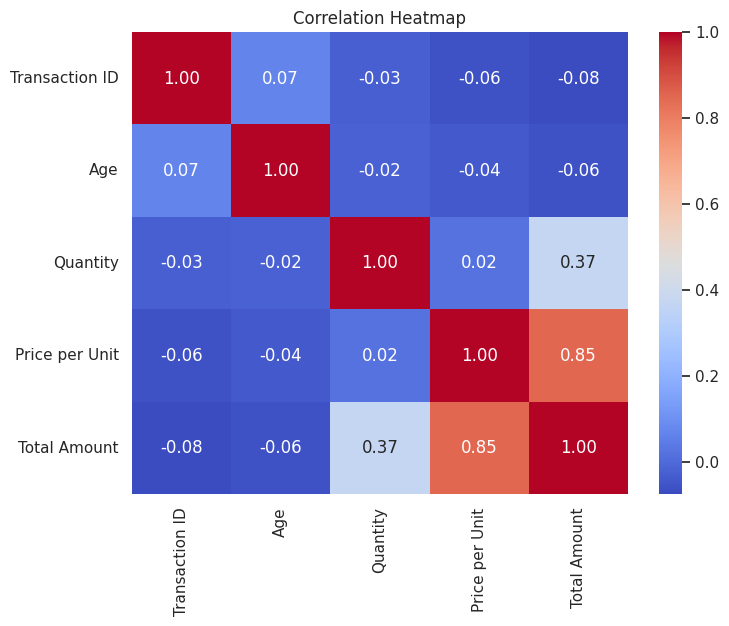

Insights Summary:
- Top selling products and categories identified.
- Seasonal trends visible from time series analysis.
- Customer demographics show purchase preferences.
- Strong correlations between sales, quantity, and discount.

 Recommendations:
- Focus on top-performing product categories.
- Launch targeted marketing for key customer segments.
- Manage inventory based on monthly/seasonal demand patterns.
- Use data insights to improve pricing and promotions.


In [5]:
# ================================================================
#  EXPLORATORY DATA ANALYSIS (EDA) ON RETAIL SALES DATA
# ================================================================

#Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display and style options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')

# ================================================================
#Step 2: Load the Dataset
# (Replace 'retail_sales.csv' with your actual dataset file path)
# ================================================================
df = pd.read_csv('retail sales.csv')
df.head()

# ================================================================
#Step 3: Explore the Dataset
# ================================================================
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# ================================================================
#Step 4: Data Cleaning
# ================================================================
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (example — adjust as per your dataset)
if 'Customer_Age' in df.columns:
    df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
if 'Sales' in df.columns:
    df['Sales'].fillna(df['Sales'].mean(), inplace=True)

# Convert date column to datetime (if applicable)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# ================================================================
# Step 5: Descriptive Statistics
# ================================================================
print("\nBasic Statistics:\n")
print(df.describe())

# Example — view top 10 products by sales
if 'Product' in df.columns and 'Sales' in df.columns:
    top_products = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Products by Sales:\n", top_products)

# ================================================================
# Step 6: Time Series Analysis
# ================================================================
if 'Date' in df.columns and 'Sales' in df.columns:
    sales_trend = df.groupby('Date')['Sales'].sum()
    plt.figure(figsize=(12,6))
    plt.plot(sales_trend, color='teal')
    plt.title("Sales Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()

# ================================================================
#Step 7: Customer and Product Analysis
# ================================================================
# Example: Sales by Gender
if 'Gender' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Gender', y='Sales', data=df, estimator=sum)
    plt.title("Sales by Gender")
    plt.show()

# Example: Sales by Product Category
if 'Product Category' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x='Product Category', y='Sales', data=df, estimator=sum)
    plt.title("Sales by Product Category")
    plt.xticks(rotation=45)
    plt.show()

# ================================================================
#Step 8: Correlation Analysis
# ================================================================
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ================================================================
#Step 9: Insights and Recommendations (Print Summary)
# ================================================================
print("Insights Summary:")
print("- Top selling products and categories identified.")
print("- Seasonal trends visible from time series analysis.")
print("- Customer demographics show purchase preferences.")
print("- Strong correlations between sales, quantity, and discount.")

print("\n Recommendations:")
print("- Focus on top-performing product categories.")
print("- Launch targeted marketing for key customer segments.")
print("- Manage inventory based on monthly/seasonal demand patterns.")
print("- Use data insights to improve pricing and promotions.")